# Importing Libraries

In [23]:
### Data Analysis and Manipulation 
import pandas as pd 
import numpy as np

### Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


sns.set() ## this is for styling
### Data Standardization and Modeling with K-Means and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Importing Data

In [24]:
#Import the data

seg_data = pd.read_csv('segmentation_data.csv')

# EDA

In [25]:
seg_data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [26]:
seg_data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


### Understanding Data is Important.

Before starting any project, We need to understand the business problem and dataset first.


### Variable Description

##### ID: Shows a unique identification of a customer.

##### Sex: Biological sex (gender) of a customer. In this dataset, there are only 2 different options.

0: male

1: female

##### Marital status: Marital status of a customer.

0: single

1: non-single (divorced / separated / married / widowed)

##### Age: The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of the creation of the dataset

18 is the lowest age observed in the dataset

76 is the highest age observed in the dataset

The average age is 36.

##### Education: Level of education of the customer.

0:other / unknown

1: high school

2: university

3: graduate school

##### Income: Self-reported annual income in US dollars of the customer.

$35832 is the lowest income observed in the dataset

$309364 is the highest income observed in the dataset


##### Occupation: Category of occupation of the customer.

0: unemployed/unskilled

1: skilled employee / official

2: management / self-employed / highly qualified employee / officer


##### Settlement size: The size of the city that the customer lives in.

0: small city

1: mid-sized city

2: big city







In [27]:
seg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [28]:
seg_data.isnull().sum()



ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [29]:
print(seg_data.drop_duplicates(inplace=True))

None


In [30]:
seg_data.shape

(2000, 8)

##### Observation

1. All data types in Integer
2. There are no missing values in the dataset
3. There are duplicate in the dataset
4. There are 2000 rows and 8 columns in the dataset

# Correlation

A good way to get an initial understanding of the relationship between the different variables is to explore how they correlate.

We calculate the correlation between our variables using corr method in the pandas library.



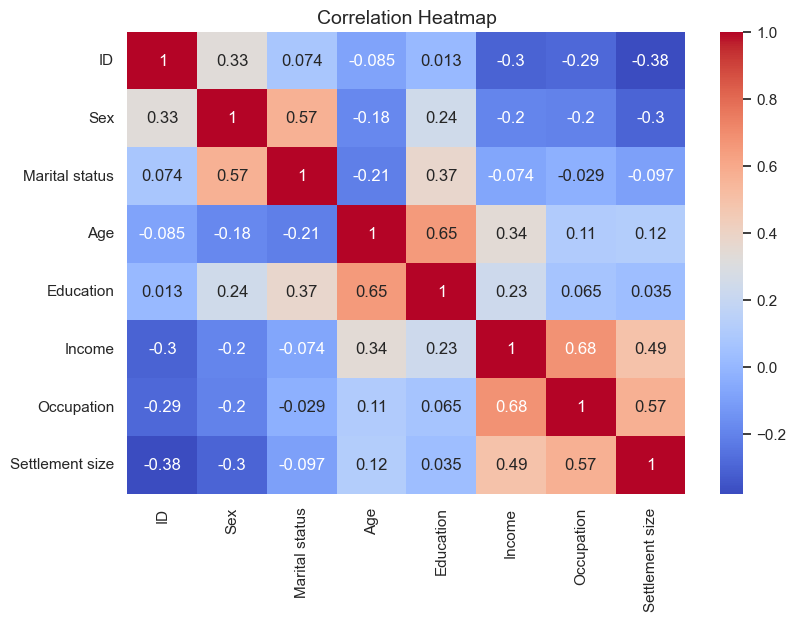

In [36]:
#plot a heatmap to show the correlation between the features

plt.figure(figsize=(9, 6))
sns.heatmap(seg_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

# plt.figure(figsize=(6,5))
# sns.heatmap(seg_data.corr(),annot=True,cmap='RdBu')
# plt.title('Correlation Heatmap',fontsize=14)
# plt.yticks(rotation =0)
# plt.show()

Let’s explore the correlation.

We see that there is a strong correlation between Education and Age. In other words, older people tend to be more highly educated.

How about income and occupation?

Their correlation is 0.68. That means If you have a higher salary, you are more likely to have a higher-level occupation such as a manager.

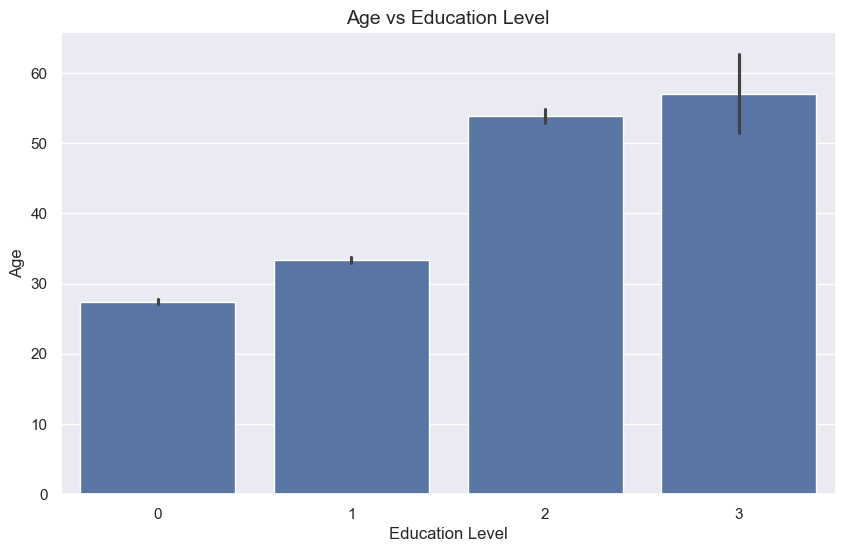

In [53]:
#plot age against education level in bar chart

plt.figure(figsize=(10,6))
sns.barplot(x='Education', y='Age', data=seg_data)
plt.title('Age vs Education Level', fontsize=14)
plt.xlabel('Education Level')
plt.ylabel('Age')
plt.show()


# Segmentation

### Data Preprocessing

We need to apply standardization to our features before using any distance-based machine learning model such as K-Means, KNN.

In general, We want to treat all the features equally and we can achieve that by transforming the features in such a way that their values fall within the same numerical range such as [0:1].

This process is commonly referred to as Standardization.

### Standardization

In [37]:
scaler = StandardScaler()
seg_data_st = scaler.fit_transform(seg_data)

In [56]:
seg_data_stand = pd.DataFrame(data = seg_data_st, columns = seg_data.columns)
seg_data_stand

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-1.731185,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,-1.729453,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-1.727721,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-1.725989,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-1.724257,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298
...,...,...,...,...,...,...,...,...
1995,1.724257,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730
1996,1.725989,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730
1997,1.727721,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730
1998,1.729453,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730


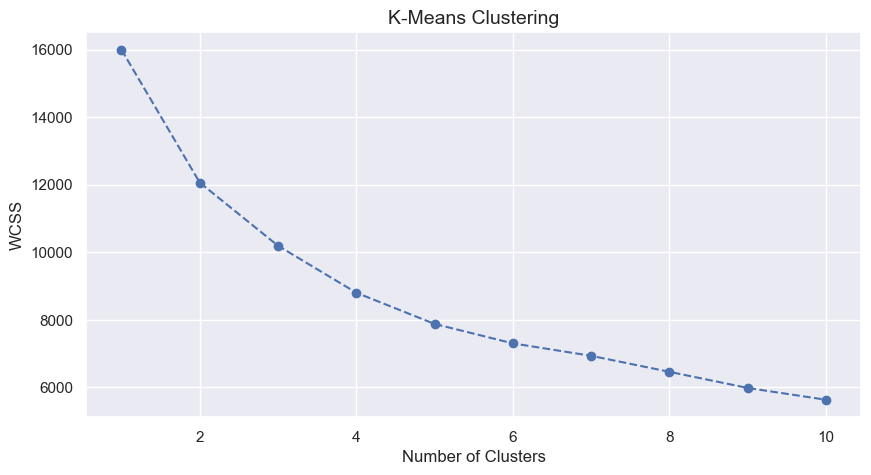

In [54]:
#Use Elbow Method to determine the number of clusters

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(seg_data_stand)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('K-Means Clustering', fontsize=14)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

The elbow in the graph is the four-cluster mark. This is the only place until which the graph is steeply declining while smoothing out afterward.

Let’s perform K-Means clustering with 4 clusters.

In [55]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [57]:
# Fitting Our Model to the Dataset

kmeans.fit(seg_data_stand)


KMeans(n_clusters=4, random_state=42)

We create a new data frame with the original features and add a new column with the assigned clusters for each point.

In [58]:
df_segm_kmeans= seg_data_stand.copy()
df_segm_kmeans = pd.DataFrame(data = seg_data_stand,columns = seg_data.columns)
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [59]:
df_segm_kmeans.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
0,-1.731185,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,2
1,-1.729453,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,1
2,-1.727721,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,3
3,-1.725989,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,0
4,-1.724257,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,0


In [60]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,,
0,-0.594289,-0.853973,-0.632826,-0.023245,-0.500714,0.503458,0.690266,0.799707
1,0.216385,0.841696,1.004079,-0.589431,0.049608,-0.403075,-0.282195,-0.394837
2,-0.233482,0.052738,0.367604,1.704612,1.821309,0.918041,0.442394,0.417401
3,0.697055,-0.107716,-0.907103,-0.104064,-0.493232,-0.696787,-0.869527,-0.836279


In [61]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,,
well-off,-0.594289,-0.853973,-0.632826,-0.023245,-0.500714,0.503458,0.690266,0.799707
fewer-opportunities,0.216385,0.841696,1.004079,-0.589431,0.049608,-0.403075,-0.282195,-0.394837
standard,-0.233482,0.052738,0.367604,1.704612,1.821309,0.918041,0.442394,0.417401
career focused,0.697055,-0.107716,-0.907103,-0.104064,-0.493232,-0.696787,-0.869527,-0.836279


In [62]:
# Add the segment labels to the table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off', 
                                                                  1:'fewer opportunities',
                                                                  2:'standard', 
                                                                  3:'career focused'})

In [63]:
df_segm_kmeans.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Labels
0,-1.731185,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,2,standard
1,-1.729453,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,1,fewer opportunities
2,-1.727721,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,3,career focused
3,-1.725989,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,0,well-off
4,-1.724257,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,0,well-off


In [67]:
print(df_segm_kmeans.columns)


Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size', 'Segment K-means', 'Labels'],
      dtype='object')


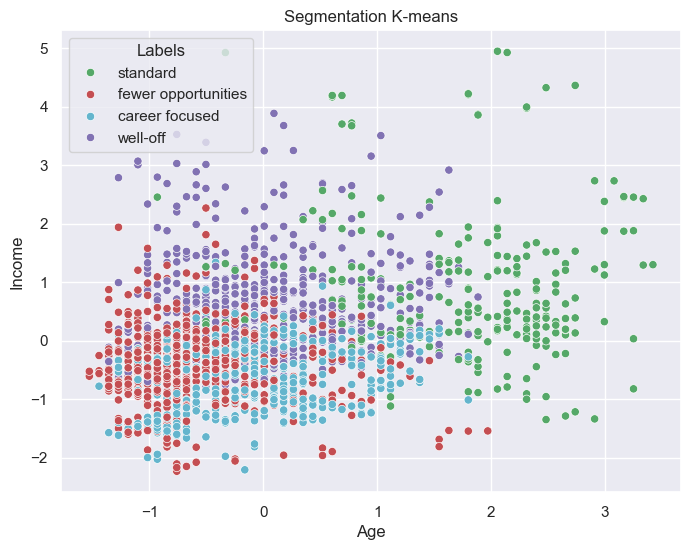

In [69]:
# Plot the results from the K-means algorithm. 
# Each point in the data set is plotted with the color of the clusters it has been assigned to.

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_segm_kmeans, x='Age', y='Income', hue='Labels', palette=['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()


# PCA

In [ ]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()

# Fit PCA with our standardized data.
pca.fit(df_std)